# Computer Vision - P3_2


## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **English**.

- The deliverable must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 26th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

In Video Segmentation:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

In Image Segmentation:

3.3. Segmentation of images.

To successfuly complete this practicum it is necessary to understand the following theory concepts: video segmentation, background subtraction, K-means clustering, different image segmentation approaches,...

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## 3.3 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

In [112]:
from skimage import io
from skimage import segmentation
from skimage import img_as_float
from matplotlib import pyplot as plt
from skimage.transform import rescale
import numpy as np
from skimage.color import rgba2rgb, rgb2gray

In [117]:
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3(tigre_f,tigre_x,tigre_xb,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre_xb, cmap='gray')


def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray', vmin=0, vmax=255)
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray', vmin=0, vmax=255)
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray', vmin=0, vmax=255)

### Felzenszwalb's efficient graph based segmentation

a) Read 'rocki.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.


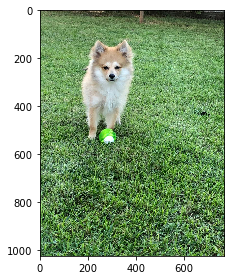

In [36]:
image = io.imread("images/rocki.jpeg")
io.imshow(image)
image = rescale(image, 0.3, multichannel=True)

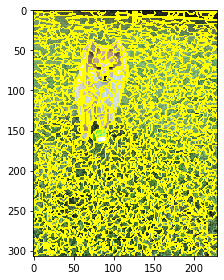

In [37]:
im_segmentation = segmentation.felzenszwalb(image)
io.imshow(segmentation.mark_boundaries(image, im_segmentation))

b) Test and explore different parameters in order to obtain a good image segmentation up to you. 
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values according to your subjective perception?
- How does each parameter behave?

Note: You can reduce the size of the image in order to accelerate the running. Does the image reduction affect the optimal values? 



***

- **Convert to grayscale**

There is no need to convert images to grayscale.

- **Convert to float**

It's not critical to convert image to float

- **Optimal Values**

For the parameters we tried, we think that optimal values are sigma=1.1, scale=500 and min_size=350. We diceide those are the best as principal elements of the image are segmented succesfully (dog, ball, ...) and there is not much segmentations on grass.

- **How does each parameter behave?**

**Sigma**: Refears to the diameter of a Gaussin kernel used for smoothing the image before segmentation. As colors are more homogeniuos as sigma increase, close elements become more agroupable.

**Scale**: Scale parameter determines indirectly the number and size of segments.

**Min_size**: Defines a minium size for cluster. High numbers implies larger clusters.


For more details on this function usage: https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.felzenszwalb

In [38]:
def felzenszwalb_with_bound(image, scale, sigma, min_size):
    im_segmentation = segmentation.felzenszwalb(image, scale=scale, sigma=sigma, min_size=min_size)
    return segmentation.mark_boundaries(image, im_segmentation, color=(1,0,0))

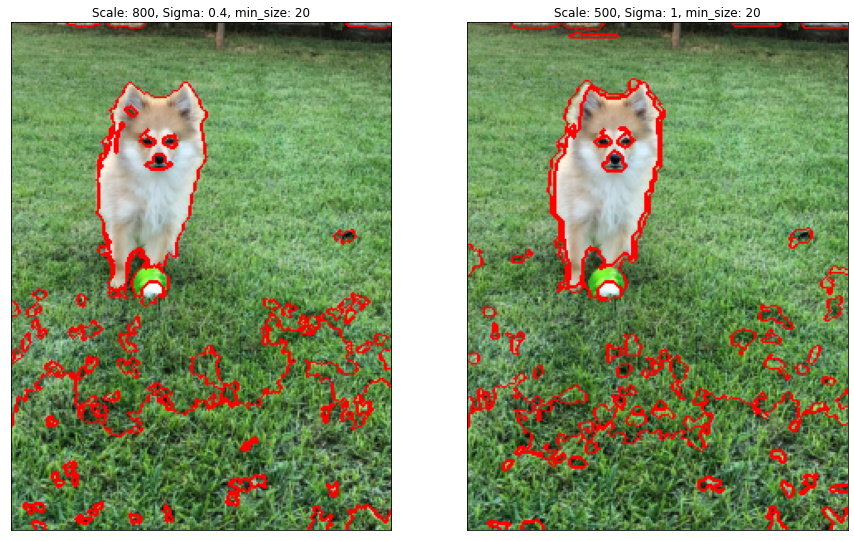

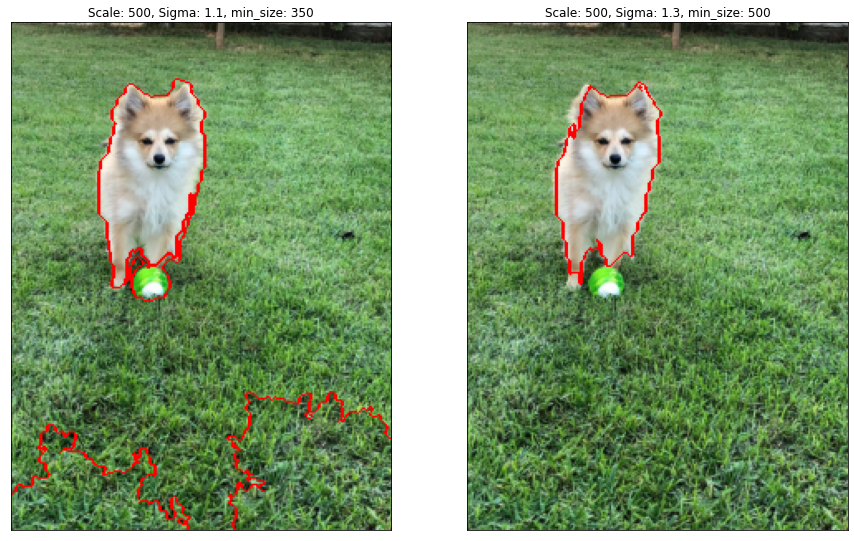

In [48]:
#scale, sigma, min_size
visualize2(
    felzenszwalb_with_bound(image, 800, 0.4, 20),
    felzenszwalb_with_bound(image, 500, 1, 20),
    "Scale: 800, Sigma: 0.4, min_size: 20",
    "Scale: 500, Sigma: 1, min_size: 20"
)

visualize2(
    felzenszwalb_with_bound(image, 500, 1.1, 350),
    felzenszwalb_with_bound(image, 500, 1.3, 500),
    "Scale: 500, Sigma: 1.1, min_size: 350",
    "Scale: 500, Sigma: 1.3, min_size: 500"
)

c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

The algorithm groups the pixels in clusters. This grouping is done using a MST for pixels, connected components are considered a cluster. The distance is computed using color and position difference.

**Pros:** This algorithm has a good performance with very variable images. When the image is very variated non-homogeneus groups of pixels are very far from homogeneus zones. This fact lets us get global features.

**Cons:** Creates very irregular shapes. 

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

float64


<ipython-input-49-2fac64d37f84>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  im_segmentation = segmentation.slic(image)


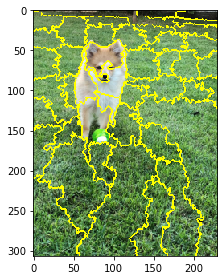

In [49]:
print(image.dtype)
im_segmentation = segmentation.slic(image)
io.imshow(segmentation.mark_boundaries(image, im_segmentation))

e) Explore what are the parameters of the slic function. Test different values for these parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values of the optional valriables?
- How does each parameter behave?

***

- **Convert to grayscale**

There is no need to convert images to grayscale.

- **Convert to float**

It's not critical to convert image to float

- **Optimal Values**

For the parameters we tried, we think that optimal values are n_segments=18, compatness=10 and sigma=2. We diceide those are the best as the dog is well segmentated and there is not much segmentations on grass.

- **How does each parameter behave?**

**n_segments**: The aproximate number of clusters

**Compactness**: Balances color proximity and space proximity. Higher values give more weight to space proximity, making clusters more square/cubic. 

**Sigma**: Width of Gaussian smoothing kernel for pre-processing for each dimension of the image.


For more details on this function usage: https://scikit-image.org/docs/dev/api/skimage.segmentation.html#slic

In [50]:
def slic_with_bound(image, n_segments, compactness, sigma):
    im_segmentation = segmentation.slic(
        image, 
        n_segments=n_segments, 
        compactness=compactness, 
        sigma=sigma
    )
    return segmentation.mark_boundaries(image, im_segmentation, color=(1,0,0))

<ipython-input-50-7a6cb0ca4cdf>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  im_segmentation = segmentation.slic(


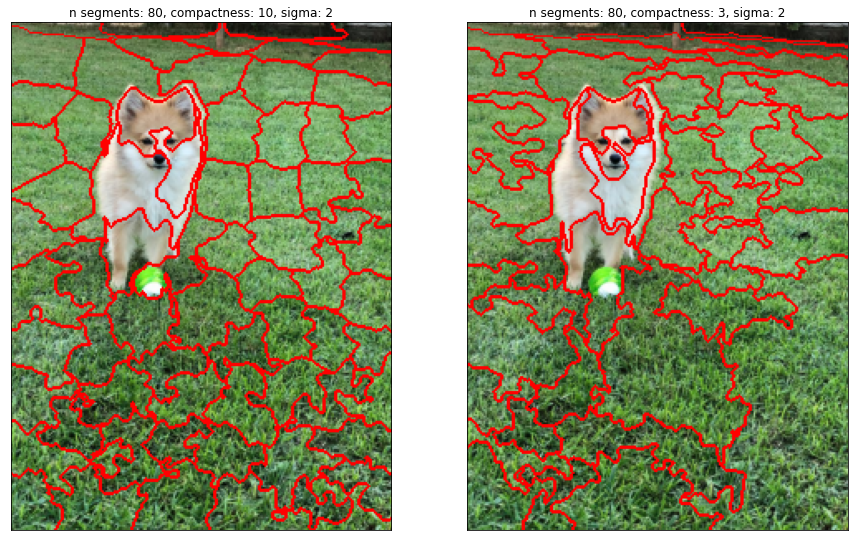

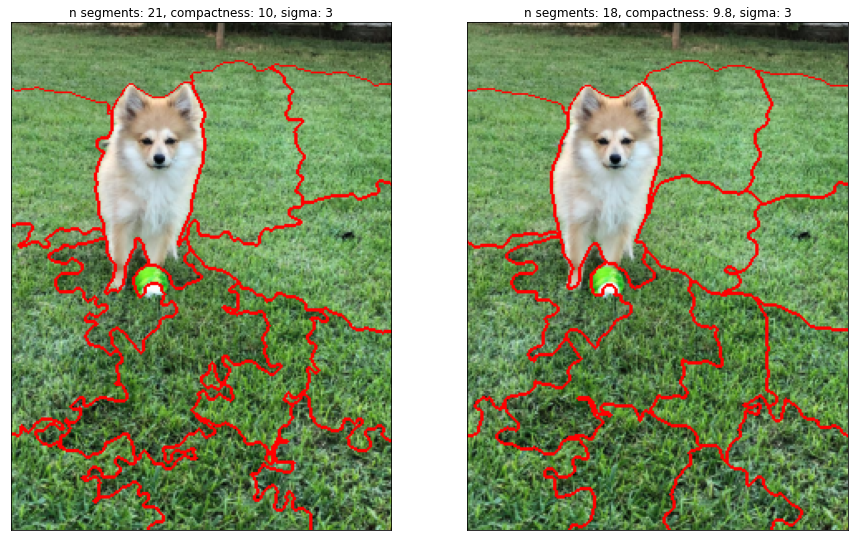

In [88]:
#your solution here

"""
https://scikit-image.org/docs/dev/api/skimage.segmentation.html#slic
"""

visualize2(
    slic_with_bound(image, 80, 10, 2),
    slic_with_bound(image, 80, 3, 2),
    "n segments: 80, compactness: 10, sigma: 2",
    "n segments: 80, compactness: 3, sigma: 2"
)

visualize2(
    slic_with_bound(image, 18, 10, 2),
    slic_with_bound(image, 18, 9.8, 3),
    "n segments: 21, compactness: 10, sigma: 3",
    "n segments: 18, compactness: 9.8, sigma: 3"
)

f) Comment what the algorithm is (in up to 3 lines).

We define a number of seeds (like ghost pixels) and randomly initialize it. We take the closest points to each seed and move the seed to the center of mass of this points. And repeat until convergence. We repeat this method with multiple initiializations of seeds and save the result with minium distance between seed and it's related pixels.

**Pros:** It's an intuitive method and always converges.

**Cons:** High memory usage and sensible to initialization. Also you have to define the number of clusters (which usually could be a problem).

### Quickshift image segmentation

g) Segment the same image using the Quickshift algorithm. 

float64


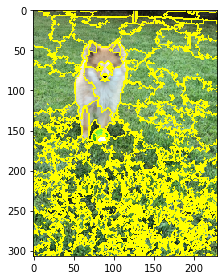

In [43]:
print(image.dtype)
im_segmentation = segmentation.quickshift(image)
io.imshow(segmentation.mark_boundaries(image, im_segmentation))

h) Test different parameters in order to obtain a good image segmentation with Quickshift algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

***

- **Optimal Values**

The optimal values are ratio=1, kernel_size=15 and max_dist=15 as maked boundaries are very close to iamge boundaries and the main elements of the image are well segmentated and there is no much segmentation i grass.

- **How does each parameter behave?**

**ratio**: Balances color-space proximity and image-space proximity. Higher values give more weight to color-space

**kernel_size**: Width of Gaussian kernel used in smoothing the sample density. Higher means fewer clusters.

**max_dist**: Cut-off point for data distances. Higher means fewer clusters.


For more details on this function usage: https://scikit-image.org/docs/dev/api/skimage.segmentation.html#quickshift

In [44]:
def quickshift_with_bound(image, ratio, kernel_size, max_dist):
    im_segmentation = segmentation.quickshift(
        image, 
        ratio=ratio, 
        kernel_size=kernel_size, 
        max_dist=max_dist
    )
    return segmentation.mark_boundaries(image, im_segmentation, color=(1,0,0))

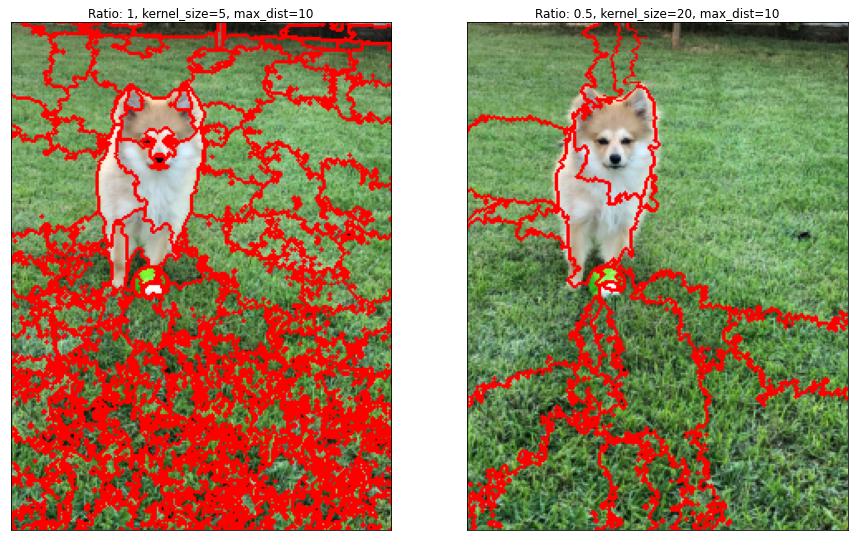

In [45]:
"""
https://scikit-image.org/docs/dev/api/skimage.segmentation.html#quickshift
"""
visualize2(
    quickshift_with_bound(image, 1, 5, 10),
    quickshift_with_bound(image, 0.5, 20, 10),
    "Ratio: 1, kernel_size=5, max_dist=10",
    "Ratio: 0.5, kernel_size=20, max_dist=10"
)

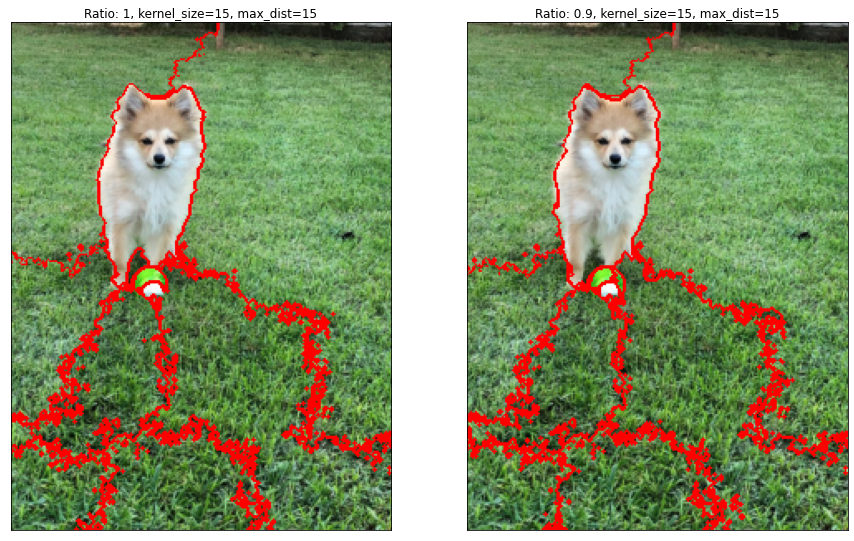

In [46]:
visualize2(
    quickshift_with_bound(image, 1, 15, 15),
    quickshift_with_bound(image, 0.9, 15, 15),
    "Ratio: 1, kernel_size=15, max_dist=15",
    "Ratio: 0.9, kernel_size=15, max_dist=15"
)

i) Comment what the algorithm is (in up to 3 lines).

This algorithm looks for local maximums of the density function in our feature space. This function is calculated for a point _p_ counting points in a neighborhood of _p_. To find local maximum, we count the points in a neighborhood of _p_ and set it's center of mass as the new _p_. We repeat until convergence.

### Comparison of segmentation algorithms
j) Plot the original image and the results of both algorithms in a 1x3 subplot using the optimal values.

<ipython-input-50-7a6cb0ca4cdf>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  im_segmentation = segmentation.slic(


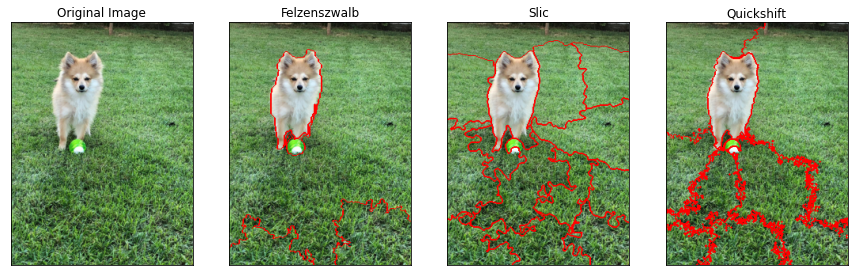

In [89]:
visualize4(
    image,
    felzenszwalb_with_bound(image, 500, 1.1, 350),
    slic_with_bound(image, 18, 10, 2),
    quickshift_with_bound(image, 1, 15, 15),
    "Original Image",
    "Felzenszwalb",
    "Slic",
    "Quickshift"
)

k) Calculate also the number of segments obtained on the image by each of the algorithms. Can the number of segments can be used as a criterion for the performance of the algorithms?

In [107]:
print("Number of segments:")

im_segmentation = segmentation.felzenszwalb(image, scale=500, sigma=1.1, min_size=350)
print("Felzenszwalb:\t", len(np.unique(im_segmentation)))

im_segmentation = segmentation.slic(image, n_segments=18, compactness=10, sigma=2)
print("Slic:\t\t", len(np.unique(im_segmentation)))

im_segmentation = segmentation.quickshift(image, ratio=1, kernel_size=15, max_dist=15)
print("Quickshift:\t", len(np.unique(im_segmentation)))

Number of segments:
Felzenszwalb:	 5
Slic:		 14


<ipython-input-107-9f706ac77d77>:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  im_segmentation = segmentation.slic(image, n_segments=18, compactness=10, sigma=2)


Quickshift:	 10


In a particular image we think it's a parameter evaluate if its a good segmentation. In this case we wanted to segmentate the dog, the ball and the grass. This are 3 elements so, if done by an human, it will be 3 regions. All in all you can't evaluate the algorithm only by it's number of segments because this segments must really segmentate image elements. 

l) Comment the differences between each method as well as their advantages and disadvantages.

One thing that must be highlighted is that Quickshift algorithm was the slowest by far.

We feel like _Felzenszwalb_ performed better in this case. 

About slic algorithm we think that its parameters are a little less intuitive than expected and it's difficult to deal with them. It could be a nice solution for images with square shapes.

m) Choose another couple of color and grayscale images from the folder 'images' as well as from internet and apply the three segmentation methods. Comment the results.

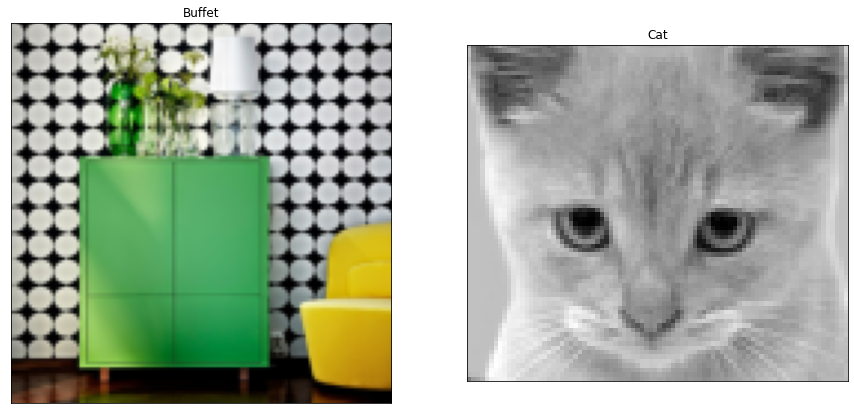

In [162]:
image1 = io.imread("images/buffet.jpg")
image1 = rescale(image1, 0.3, multichannel=True)
image2 = io.imread("images/cat.jpg")
image2 = rescale(image2, 0.3, multichannel=True)
image2 = rgb2gray(image2)
visualize2(image1, image2, "Buffet", "Cat")

<ipython-input-50-7a6cb0ca4cdf>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  im_segmentation = segmentation.slic(


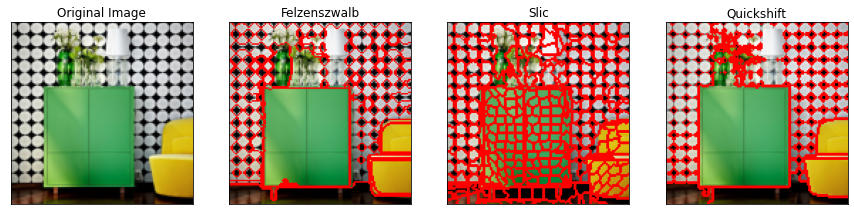

In [163]:
visualize4(
    image1,
    felzenszwalb_with_bound(image1, 500, 1.1, 10),
    slic_with_bound(image1, 500, 5, 0),
    quickshift_with_bound(image1, 1, 15, 15),
    "Original Image",
    "Felzenszwalb",
    "Slic",
    "Quickshift"
)

<ipython-input-50-7a6cb0ca4cdf>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  im_segmentation = segmentation.slic(


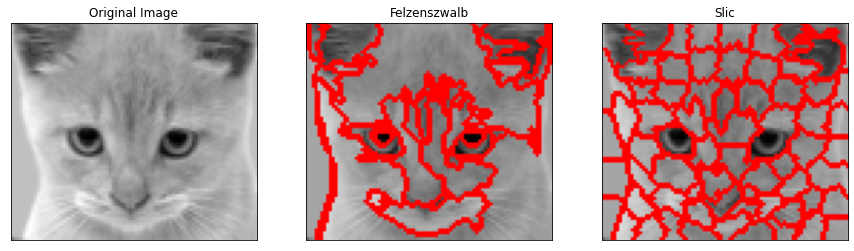

In [164]:
visualize3(
    image2,
    felzenszwalb_with_bound(image2, 100, 0.5, 10),
    slic_with_bound(image2, 60, 0.1, 0),
    "Original Image",
    "Felzenszwalb",
    "Slic"
)

The firts observation we do is that Quickshift's input image can't be greyscale

We notice than slic algorithm allways has a lot of unnecessary segments. Flat textures are allways segmented in a lot of little parts.

In first image, Felzenszwalb and Quickshift performed well segmenting the furnitures and the texture in the wall. The glass bottle is difficult to segmentate as it has a lot of transparency but Felzenszwalb really separates it in a single object. On the other hand slic and quickshift haven't done a nice job there.

For cat segmentation we wanted to separate the different parts of the face (eyes, ears, mouth, ...) and Felzenszwalb does a nice job.